# Lab 3 - Garcia, Manson & Mente

## OVERVIEW OF ASSIGNMENT

## Business Understanding and Data Background

Referenced text: http://files.grouplens.org/datasets/movielens/ml-1m-README.txt

We have decided to build a recommendation engine based on the compiled user movie ratings contained in the movielens data set.  This data set was released in 2003 by the University of Minnesota's Department of Computer Science and Engineering, and was originally collected to help a research group in the department study collaborative filtering.  The movielens data set continues to grow, and the group operates a non-profit movie recommendation engine at movielens.org that incorporates many different recommendation engine models to generate accurate results even if very little information about the user is provided.  We experiemented with our own preferences and were surprised at the accuracy! 

Our purpose in selecting this dataset to work with is to determine if we can improve the accuracy of the recommender on frequently rated movies by removing infrequently rated movies or users that rate infrequently from the dataset. A business example of why this may be worthwhile might be a desire to create a high-performing recommender that focuses specifically on cinephiles.   

To do this we'll create three recommenders, one based on the entire data set, one based on the ratings of movies with more than 250 ratings, and finally one based on the ratings of movies with more than 250 ratings and users who have rated more than 25 movies. Then we'll compare the performance of the recommenders based on the evaluation criteria below.  

We have selected the dataset with 1 million rows so it would be a substantial size but not overwhelm our computers. The data is provided in three separate files for ratings, users and movies. 

## Evaluation Criteria

The evaluation criteria used for project will be three different Root-Mean-Squared-Error values, which will obtain using graphlab's evaluate funciton. The RMSE measures the difference between what we expect and the actual residuals that we observed in the test data.  A smaller RMSE means the recommender is predicting rating values that are close to what the actual ratings are. 

The first type of RMSE we'll examine will be the RMSE by item, which would contain the average root mean square error for each item in the data set.  The second will be the RMSE by user, which is the same for each user in the data set.  The third is the overall RSME, which is the average for each user-item rating in the data set. Comparison of these values will determine which models perform best. 

Each of these values will be calculated using the graphlab method for recommenders "evaluate_rmse".  Documentation on this method is avaialable here: https://dato.com/products/create/docs/generated/graphlab.recommender.ranking_factorization_recommender.RankingFactorizationRecommender.evaluate.html#graphlab.recommender.ranking_factorization_recommender.RankingFactorizationRecommender.evaluate

As a secondary evaluation metric, we will use the average precision for each user in the database. This would be relevent in our "recommendation engine for cinephiles" business case above.  In that scenario our target audience would be users that put a lot of effort into ranking many movies, and we'd want to be sure that they get very strong recommendations returned to them.  


## RATINGS FILE DESCRIPTION
================================================================================

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings


## USERS FILE DESCRIPTION
================================================================================

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"


- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"


## MOVIES FILE DESCRIPTION
================================================================================

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

Below we import the three files to create dataframes and confirm the correct upload via the info and head functions. There are more than a million ratings, 6000 users and 3000 movies in the files. Then, we combine them into one dataframe with the pandas merge function. We also confirmed that there are no null values in the combined dataframe .

In [2]:
import pandas as pd #import library and rename
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

CarriePathRatings = "C:\\ratings.dat"
CarriePathUsers = "C:\\users.dat"
CarriePathMovies = "C:\\movies.dat"

MentePathRatings = "ratings.dat"
MentePathUsers = "users.dat"
MentePathMovies = "movies.dat"

#Ratings
header_row_ratings=['UserID', 'MovieID','Rating','Timestamp'] #add header row
df_ratings = pd.read_csv(MentePathRatings,sep='::',names=header_row_ratings) #read in the csv file and separate attributes
#df_ratings = pd.read_csv(MentePathRatings,sep='::',names=header_row_ratings) #read in the csv file and separate attributes

#Users
header_row_users=['UserID','Gender','Age','Occupation','Zip-code'] 
df_users = pd.read_csv(MentePathUsers,sep='::',names=header_row_users) #read in the csv file and separate attributes
#df_users = pd.read_csv(MentePathUsers,sep='::',names=header_row_users) #read in the csv file and separate attributes

#Movies
header_row_movies=['MovieID','Title','Genres'] 
df_movies = pd.read_csv(MentePathMovies,sep='::',names=header_row_movies) #read in the csv file and separate attributes
#df_movies = pd.read_csv(MentePathMovies,sep='::',names=header_row_movies) #read in the csv file and separate attributes

#get info
df_ratings.info()
df_users.info()
df_movies.info()

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 38.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 283.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:28: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.


In [3]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
left = pd.DataFrame(df_ratings)
right = pd.DataFrame(df_users)
ratings_users = pd.merge(left,right, on='UserID')
ratings_users.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [7]:
left = pd.DataFrame(ratings_users)
right = pd.DataFrame(df_movies)
df_combined = pd.merge(left,right, on='MovieID')
df_combined.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [8]:
#check for null values
df_combined.isnull()
df_combined.isnull().any(axis=1)
df_combined[df_combined.isnull().any(axis=1)]

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres


In [9]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
UserID        1000209 non-null int64
MovieID       1000209 non-null int64
Rating        1000209 non-null int64
Timestamp     1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
Occupation    1000209 non-null int64
Zip-code      1000209 non-null object
Title         1000209 non-null object
Genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [10]:
import numpy as np
categ_features = ['Occupation','Age','UserID','MovieID','Zip-code','Title','Genres'];
df_combined[categ_features] = df_combined[categ_features].astype(np.object)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
UserID        1000209 non-null object
MovieID       1000209 non-null object
Rating        1000209 non-null int64
Timestamp     1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null object
Occupation    1000209 non-null object
Zip-code      1000209 non-null object
Title         1000209 non-null object
Genres        1000209 non-null object
dtypes: int64(2), object(8)
memory usage: 83.9+ MB


## Summary of data cleansing

Now that we've combined the larger data set into a single dataframe, we'll decide what threshold we would like to set for the number of ratings a movie needs to have to be included in the frequently rating data.  First we'll look at the distribution of the main data set.  The graph below shows the a scatterplot of number of ratings and mean rating for each movie, and the histogram for each variable.  We can see that within the data set the number of ratings per movie is heavily positively skewed, with the most frequent movies having less than a hundred ratings.  We will pick a cutoff of 250 and see how that changes the distribution.  

Rating  size    269.889099
        mean      3.238892
dtype: float64 Rating  size    384.047838
        mean      0.672925
dtype: float64


C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


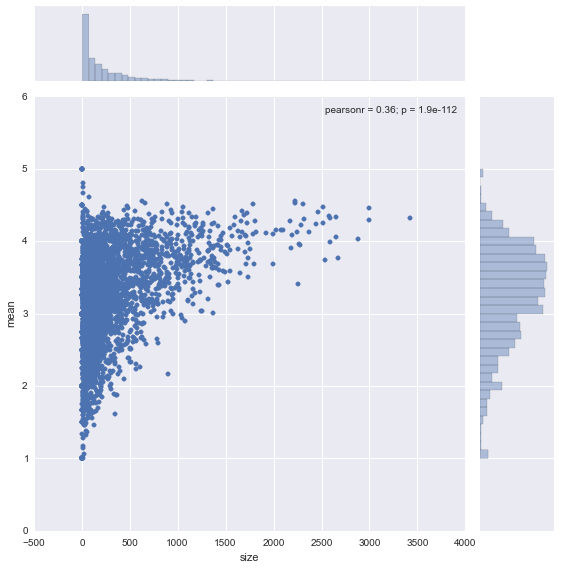

In [12]:
import seaborn as sns
movie_stats = df_combined.groupby('Title').agg({'Rating': [np.size, np.mean]})
avg_size = movie_stats.mean()
std_dev = movie_stats.std()
print avg_size, std_dev

sns.jointplot(x='size', y='mean', data=movie_stats['Rating'],size=8);

The scatterplot and histograms below show the average rating and number of ratings for movies once movies with less than 250 ratings are removed.  You can see we no longer have a huge spike at the low end of the number of ratings distribution, but we also have shifted the distribution of average ratings up, with respect to the previous graph.  This makes intuitive sense, as "better" movies are more likely to be seen by more people and rated more frequently than ones that are rated poorly. Below we will create our more frequently rated movie dataframe with the less frequently rated movies filtered out.  Doing so removed roughly 200,000 rows of data from the dataset.

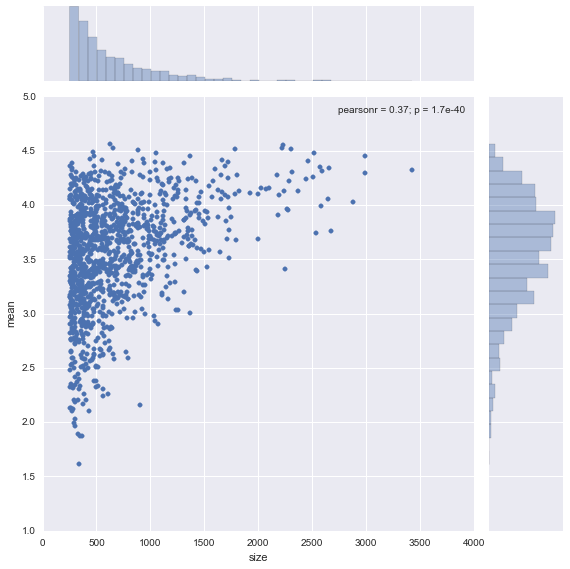

In [13]:
atleast_250 = movie_stats['Rating']['size'] >= 250
df_250 = movie_stats[atleast_250]
sns.jointplot(x='size', y='mean', data=df_250['Rating'],size=8)

In [14]:
df_count = pd.merge(df_combined, pd.DataFrame(df_combined.groupby('MovieID').agg({'Rating': [np.size]})),left_on='MovieID',right_index=True)
df_count.columns = ['UserID', 'MovieID','Rating','Timestamp','Gender','Age','Occupation','Zip-code','Title','Genres','Movie_Count']
df_freq = df_count[df_count['Movie_Count'] >= 250]
print len(df_freq), len(df_combined)

808922 1000209


We'll now repeat the same filtering exercise, but this time based on the total number of ratings a user has provided to the recommendation engine.  The graph below shows the a scatterplot of number of ratings and mean rating for each user.  The average number of movies a user rates is 165, and the average rating is 3.7, again showing evidence that there is a bias to the higher end of the rating scale.  We'll filter out any users that have rated less than 50 movies into our final "cinephile" dataset. 

Rating  size    165.597517
        mean      3.702705
dtype: float64 Rating  size    192.747029
        mean      0.429622
dtype: float64


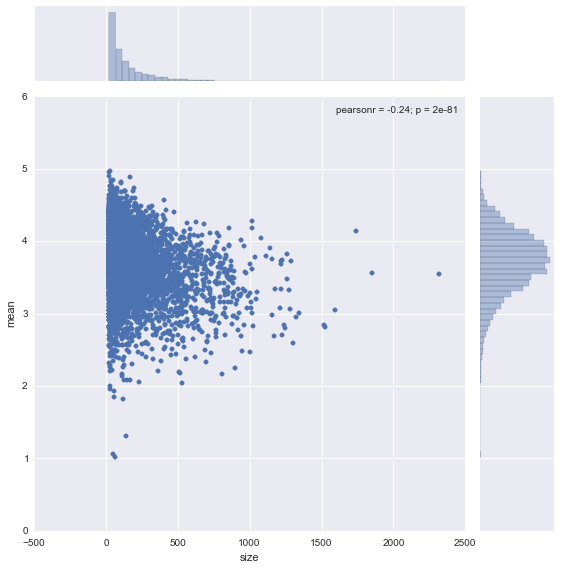

In [15]:
movie_stats_2 = df_combined.groupby('UserID').agg({'Rating': [np.size, np.mean]})
avg_size = movie_stats_2.mean()
std_dev = movie_stats_2.std()
print avg_size, std_dev

sns.jointplot(x='size', y='mean', data=movie_stats_2['Rating'],size=8);

In [16]:
df_count = pd.merge(df_freq, pd.DataFrame(df_freq.groupby('UserID').agg({'Rating': [np.size]})),left_on='UserID',right_index=True)
df_count.columns = ['UserID', 'MovieID','Rating','Timestamp','Gender','Age','Occupation','Zip-code','Title','Genres','Movie_Count','User_Count']
df_freq_2 = df_count[df_count['User_Count'] >= 50]
print len(df_freq_2), len(df_combined)

747681 1000209


The final dataset (df_freq_2) has roughly 750,000 records in it. So we've sacrifice about 25% of the data in hopes of getting a better recommendation engine for a specific subset of users.  

## Data Exploration

For our exploration of the data, we'll concentrate on the full set of movie ratings, and come back to our frequenly rated data set later for model comparison. Some interesting features of the million record data set of ratings. 

In [17]:
df_combined[categ_features].describe()

,Occupation,Age,UserID,MovieID,Zip-code,Title,Genres
count,1000209,1000209,1000209,1000209,1000209,1000209,1000209
unique,21,7,6040,3706,3439,3706,301
top,4,25,4169,2858,94110,American Beauty (1999),Comedy
freq,131032,395556,2314,3428,3802,3428,116883


In [18]:
df_freq_2[categ_features].describe()

,Occupation,Age,UserID,MovieID,Zip-code,Title,Genres
count,747681,747681,747681,747681,747681,747681,747681
unique,21,7,4011,1216,2555,1216,254
top,4,25,4169,2858,94110,American Beauty (1999),Comedy
freq,99810,303724,1039,2633,2949,2633,82849


In [19]:
df_combined.describe()

,Rating,Timestamp
count,1000209.000000,1.000209e+06
mean,3.581564,9.722437e+08
std,1.117102,1.215256e+07
min,1.000000,9.567039e+08
25%,3.000000,9.653026e+08
50%,4.000000,9.730180e+08
75%,4.000000,9.752209e+08
max,5.000000,1.046455e+09


In [20]:
df_freq_2.describe()

,Rating,Timestamp,Movie_Count,User_Count
count,747681.000000,7.476810e+05,747681.000000,747681.000000
mean,3.667960,9.721705e+08,958.583452,302.346347
std,1.072998,1.212492e+07,625.309621,196.962944
min,1.000000,9.567039e+08,250.000000,50.000000
25%,3.000000,9.652792e+08,477.000000,142.000000
50%,4.000000,9.727860e+08,786.000000,258.000000
75%,4.000000,9.752125e+08,1233.000000,421.000000
max,5.000000,1.046455e+09,3428.000000,1039.000000


Using the full dataset, ratings for movies range from 1 to 5 with a mean score of 3.58. Using the limited dataset with requirements for minimum movie and user ratings counts, the mean increases to 3.66. The standard deviation declines slightly from 1.11 to 1.07. 

Let's continue to explore the limited dataset (df_freq_2).

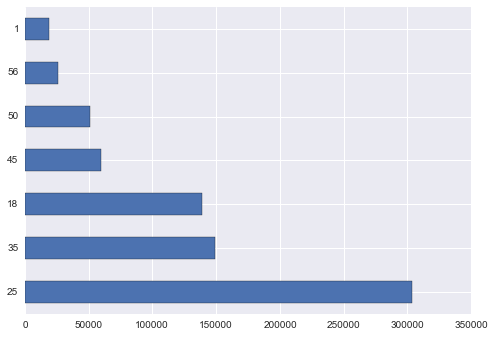

In [21]:
#showing frequency of ages
df_freq_2.Age.value_counts().plot(kind='barh')

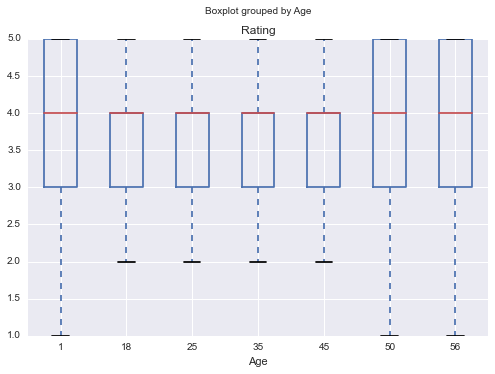

In [22]:
df_freq_2.boxplot(column='Rating', by = 'Age')

The largest age group is 25-34, and the smallest age group is under 18. The plot above suggests that age groups have similar variability in movie ratings until the age of 50, where the the the variability increases.

In [23]:
df_gender = df_freq_2.groupby(by=['Gender'])
print df_gender.Rating.mean()

Gender
F    3.692967
M    3.660262
Name: Rating, dtype: float64


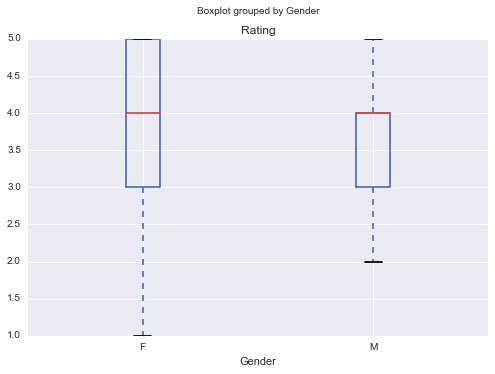

In [24]:
#ax = df_combined.boxplot()
df_freq_2.boxplot(column='Rating', by = 'Gender')

Ratings by males and females show similar means but different variances per the boxplots above. Specifically, the variance for females is greater than for males.

In [25]:
df_occup = df_freq_2.groupby(by=['Occupation'])
print df_occup.Rating.mean()

Occupation
0     3.631066
1     3.643472
2     3.645468
3     3.738416
4     3.644975
5     3.646027
6     3.746495
7     3.677334
8     3.618212
9     3.696884
10    3.653574
11    3.695644
12    3.709313
13    3.833059
14    3.696054
15    3.749450
16    3.676509
17    3.692767
18    3.630980
19    3.568638
20    3.610507
Name: Rating, dtype: float64


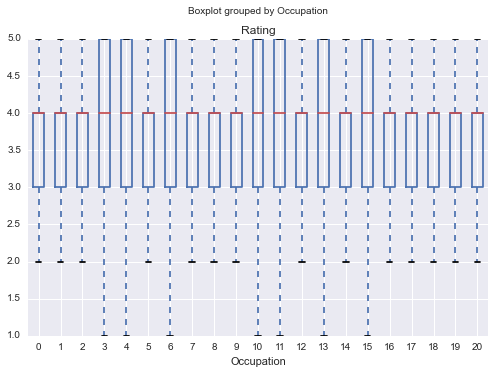

In [26]:
#ax = df_combined.boxplot()
df_freq_2.boxplot(column='Rating', by = 'Occupation')

Boxplots for occupation type act similarly according to two groups. One group (including 0,1,2,5,7,8,9,12,16,17,18,19 and 20) shows a lower, left-skewed rating distribution. The remaning groups show a larger variance. By looking at the occupation types listed at the beginning of this notebook, there doesn't seem to be an obvious reason for these groups to exist.

In [27]:
drama = df_freq_2[df_combined['Genres'].str.contains("Drama")]
drama.astype(np.object)
print "Average drama rating:" 
print drama.Rating.mean()

comedy = df_freq_2[df_combined['Genres'].str.contains("Comedy")]
comedy.astype(np.object)
print "Average comedy rating:" 
print comedy.Rating.mean()

action = df_freq_2[df_combined['Genres'].str.contains("Action")]
action.astype(np.object)
print "Average action rating:" 
print action.Rating.mean()

doc = df_freq_2[df_combined['Genres'].str.contains("Documentary")]
doc.astype(np.object)
print "Average documentary rating:" 
print doc.Rating.mean()

Average drama rating:
3.84283380354
Average comedy rating:
3.62299608778
Average action rating:
3.5321423573
Average documentary rating:
4.13404417365


C:\Anaconda\lib\site-packages\pandas\core\frame.py:1942: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


There are 301 separate genre categories in this dataset because MovieLens allows multiple genres to describe a movie. The means above show that out of the four categories we explored, documentaries have the highest average rating of 4.13.

In [28]:
#source: http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/
most_rated = df_freq_2.groupby('Title').size().order(ascending=False)[:25]
most_rated

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


Title
American Beauty (1999)                                   2633
Star Wars: Episode V - The Empire Strikes Back (1980)    2586
Star Wars: Episode IV - A New Hope (1977)                2513
Star Wars: Episode VI - Return of the Jedi (1983)        2381
Matrix, The (1999)                                       2304
Terminator 2: Judgment Day (1991)                        2278
Men in Black (1997)                                      2271
Jurassic Park (1993)                                     2259
Back to the Future (1985)                                2239
Saving Private Ryan (1998)                               2230
Fargo (1996)                                             2179
Silence of the Lambs, The (1991)                         2178
Raiders of the Lost Ark (1981)                           2172
Sixth Sense, The (1999)                                  2073
Groundhog Day (1993)                                     2043
Braveheart (1995)                                        2033
Pr

In [29]:
#best rated movies with at least 100 ratings
#source: http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/
movie_stats[atleast_250].sort([('Rating', 'mean')], ascending=False)[:15]

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


Rating          
                                                     size      mean
Title                                                              
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
Schindler's List (1993)                              2304  4.510417
Wrong Trousers, The (1993)                            882  4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         470  4.491489
Raiders of the Lost Ark (1981)                       2514  4.477725
Rear Window (1954)                                   1050  4.476190
Star Wars: Episode IV - A New Hope (1977)            2991  4.453694
Third Man, The (1949)                                 480  4.452083
Dr. Strangelove or: How I Learned to Stop Worry...   1367  4.449890
Wallace & Gromit: The Best of Aardman Animation...    438  4.426941
To Kill a Mockingbird (1962)                          928  4.425647

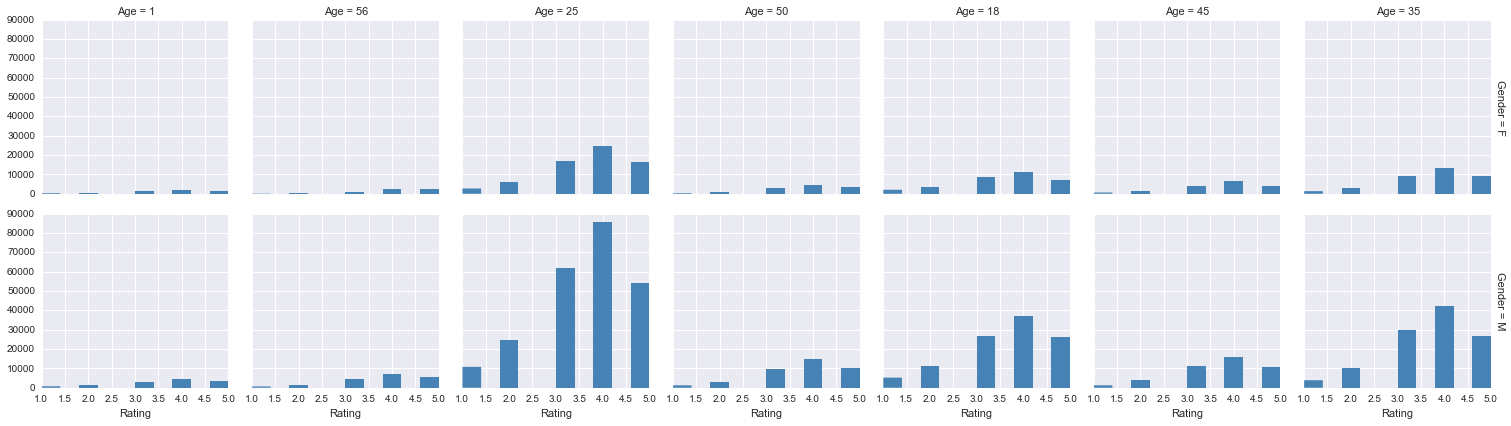

In [30]:
#df_sub = df_combined[['Rating','Age','Gender']]
#df_normalized = (df_sub-df_sub.mean())/(df_sub.std())
#df_sorted = df_normalized.sort(columns='Rating')

sns.set(style="darkgrid")
g = sns.FacetGrid(df_freq_2, col="Age", row="Gender", margin_titles=True, size=3)
g.map(plt.hist, "Rating", color="steelblue", lw=0)

The facet grid above shows the ratings histograms for each gender and age group pair. The histogram shapes are more or less the same shape for each gender/age group tile. The bar height is higher for men indicating that this dataset has more ratings made by men than for women. It would be interesting to find it out there are simply more men users or if men are more likely to rate a movie.

## Recommendation with GraphLab

We utilized Dr. Larson's GitHub Notebook No. 13 as a source for this work. https://github.com/eclarson/DataMiningNotebooks/blob/master/13.%20Recommendation%20Systems.ipynb

## Setting up the SFrames

Although we decided to utilize the dataser with a required number of movie and user ratings (df_freq_2), we will continue by comparing three datasets to see if our recommendation engine is better.

In [31]:
#First we will create the SFrame that will be used for the entire data set.
import graphlab as gl
gl_sframe = gl.SFrame(df_combined)
print gl_sframe

#Next we will create the SFrame for the filtered data set based on frequently rated movies
gl_sframe_freq = gl.SFrame(df_freq)
print gl_sframe_freq


#Finally we'll create the SFrame for the filtered data set based on frequently rated movies and users who rate frequently.
gl_sframe_freq_2 = gl.SFrame(df_freq_2)
print gl_sframe_freq_2

[INFO] 1449797068 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to C:\Anaconda\lib\site-packages\certifi\cacert.pem
1449797068 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This trial license of GraphLab Create is assigned to bmente@smu.edu and will expire on December 31, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-5976 - Server binary: C:\Anaconda\lib\site-packages\graphlab\unity_server.exe - Server log: C:\Users\BMENTE\AppData\Local\Temp\graphlab_server_1449797068.log.0
[INFO] GraphLab Server Version: 1.7.1


+--------+---------+--------+-----------+--------+-----+------------+----------+
| UserID | MovieID | Rating | Timestamp | Gender | Age | Occupation | Zip-code |
+--------+---------+--------+-----------+--------+-----+------------+----------+
|   1    |   1193  |   5    | 978300760 |   F    |  1  |     10     |  48067   |
|   2    |   1193  |   5    | 978298413 |   M    |  56 |     16     |  70072   |
|   12   |   1193  |   4    | 978220179 |   M    |  25 |     12     |  32793   |
|   15   |   1193  |   4    | 978199279 |   M    |  25 |     7      |  22903   |
|   17   |   1193  |   5    | 978158471 |   M    |  50 |     1      |  95350   |
|   18   |   1193  |   4    | 978156168 |   F    |  18 |     3      |  95825   |
|   19   |   1193  |   5    | 982730936 |   M    |  1  |     10     |  48073   |
|   24   |   1193  |   5    | 978136709 |   F    |  25 |     7      |  10023   |
|   28   |   1193  |   3    | 978125194 |   F    |  25 |     1      |  14607   |
|   33   |   1193  |   5    

## Model 1: Recommender built on the full data set

In order to compare our two recommenders, we first need to create one based on the full data set.  We will use the default recommender model in graphlab, the ranking factorization recommender. This model uses patterns of user ratings (instead of the complete k-nearest neighbors model) to determine the likely associations in the data. Doing so provides very accurate models in a way that uses memory very efficiently.  

It should be noted the solver used for the recommender below is the Adaptive Gradient Stochastic Gradient Descent or adagrad, instead of the Stochastic Gradient Descent used in the examples discussed in class.  When not specified, the Create function selects the best solver to use based on the geometry of the data. The adagrad solver gives frequently occuring movies low learning rates and infreqeuently occuring movies high learning rates to compensate.  It will be interesting to see what solver the auto function selects for the frequently rated data set.    

## Cross Validation Set-Up

Here we set up our cross-validation. Let's start with an 80/20 split.

In [59]:
data = gl_sframe
train, test = gl.recommender.util.random_split_by_user(data,
                                                       user_id="UserID", item_id="Title",
                                                       item_test_proportion=0.2)


In [60]:
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')


model_full = gl.ranking_factorization_recommender.create(train, user_id="UserID", item_id="Title", target="Rating",max_iterations=50)
results = model_full.recommend(users=None, k=5)
model_full.save("model_full")
results.head() # the recommendation output

rmse_results_full = model_full.evaluate(test)



PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 965654 observations with 6040 users and 3702 items.
PROGRESS:     Data prepared in: 4.68135s
PROGRESS: Training ranking_factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 32       |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 1e-009   |
PROGRESS: | solver                         | Solver used for training                         | adagrad  |
PROGRESS: | linear_regularization          | L2 Regularization on Lin

In [61]:
import graphlab.aggregate as agg
rmse_results_full['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')])

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
36,0.0748055555556,0.0931394770833,0.0863414311608,0.0938204882317
2,0.1515,0.279817351142,0.00961535939781,0.0271086183675
46,0.0683043478261,0.0834789288923,0.0998025684584,0.102163060067
31,0.0783225806452,0.0989792650061,0.0775549107079,0.0890263947877
26,0.0830384615385,0.10661354616,0.0698613187171,0.0836195419959
8,0.116875,0.170145847363,0.0300257673172,0.0509729503351
5,0.1284,0.202567124677,0.0203052485248,0.0411288591011
16,0.094125,0.126860590315,0.0485983895654,0.067330302464
41,0.0715609756098,0.0880134514623,0.0932809944643,0.0969455942751
4,0.13775,0.22324300101,0.0173809223684,0.0367070640493


The RMSE measures the difference between what we expect and what we observe (residuals). The overal RMSE for the recommender above was 1.1511.  The RMSE by user ranged from  0.09868 - 5.5526.  The RMSE by item ranged from  0.00560 - 11.579.

Our secondary evaluation metric seems to vary greatly. With a cutoff of less than 16 the precision values are very good, greater than 10%, but at cutoffs great thatn that it dips to 7% and 8%.  

 

## Model 2: Recommender built on the data set solely of movies with at least 250 ratings 

In [62]:
data = gl_sframe_freq
train, test = gl.recommender.util.random_split_by_user(data,
                                                       user_id="UserID", item_id="Title",
                                                       item_test_proportion=0.2)

In [63]:
gl.canvas.set_target('ipynb')


model_freq = gl.ranking_factorization_recommender.create(train, user_id="UserID", item_id="Title", target="Rating",max_iterations=50)
results2 = model_freq.recommend(users=None, k=5)
model_freq.save("model_freq")
results2.head() # the recommendation output

rmse_results_freq = model_freq.evaluate(test)

PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 782320 observations with 6040 users and 1216 items.
PROGRESS:     Data prepared in: 4.56314s
PROGRESS: Training ranking_factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 32       |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 1e-009   |
PROGRESS: | solver                         | Solver used for training                         | adagrad  |
PROGRESS: | linear_regularization          | L2 Regularization on Lin

In [64]:
### import graphlab.aggregate as agg
rmse_results_freq['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')])

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
36,0.07375,0.106516006883,0.101806921917,0.116607805421
2,0.1115,0.245596722291,0.00993383879083,0.0348526954624
46,0.0688913043478,0.0986593473737,0.119641510195,0.127798415149
31,0.0758709677419,0.111503283853,0.0897321329821,0.10868217657
26,0.0788846153846,0.116471794844,0.0786725999344,0.101858141262
8,0.100625,0.164932514608,0.0311414621246,0.0608407756818
5,0.1024,0.186317578344,0.0196738998255,0.0461759124385
16,0.0900625,0.135475421549,0.0565578707113,0.0857837811377
41,0.0710487804878,0.101626952516,0.111235017754,0.122093235676
4,0.1045,0.196098827126,0.0164292908223,0.0419326585993


The overal RMSE for the recommender above was 1.19257. The RMSE by user ranged from 0.1785 - 6.6828, which is a significantly larger spread than the first model.  The RMSE by item ranged from 0.2501 - 4.8232. The RSME by item is a much smaller range, which intuitively makes sense since each movie in the data set has a large number of ratings for it.

The average precision by user appear to be 3-5% lower than the full model, especially at cutoffs of less than 10 items.  

So filtering the data just based on frequently rated movies has signficantly degraded the model when compared to the full version.  


## Model 3: Recommender built on the data set solely of movies with at least 250 ratings and Users with at least 50 ratings

In [65]:
data = gl_sframe_freq_2
train, test = gl.recommender.util.random_split_by_user(data,
                                                       user_id="UserID", item_id="Title",
                                                       item_test_proportion=0.2)

In [66]:
gl.canvas.set_target('ipynb')


model_freq_2 = gl.ranking_factorization_recommender.create(train, user_id="UserID", item_id="Title", target="Rating",max_iterations=50)
results3 = model_freq_2.recommend(users=None, k=5)
model_freq_2.save("model_freq_2")
results3.head() # the recommendation output

rmse_results_freq_2 = model_freq_2.evaluate(test)

PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 709865 observations with 4011 users and 1216 items.
PROGRESS:     Data prepared in: 6.27161s
PROGRESS: Training ranking_factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 32       |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 1e-009   |
PROGRESS: | solver                         | Solver used for training                         | adagrad  |
PROGRESS: | linear_regularization          | L2 Regularization on Lin

In [67]:
import graphlab.aggregate as agg
rmse_results_freq_2['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')])

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
36,0.159222222222,0.135275712966,0.159479319973,0.099098256672
2,0.263,0.346887589862,0.0155368548578,0.0261823139022
46,0.146304347826,0.123030994911,0.186934454171,0.105961263422
31,0.167580645161,0.143281647789,0.144596592205,0.0934024361341
26,0.177653846154,0.153633694645,0.128855996655,0.0895182611724
8,0.22975,0.231562491565,0.0514605954371,0.0544336811516
5,0.2426,0.267255009308,0.0346183235697,0.042727688429
16,0.20125,0.183601130171,0.0909692339002,0.074003428044
41,0.15243902439,0.128542601794,0.174097343118,0.103689729192
4,0.25,0.28591956911,0.0286361896324,0.0375046272124


The results of this model are very interesting.  The overal RMSE for the recommender above was 1.2703, still poorer than the model built with the full data set. The RMSE by user ranged from 0.3737 - 3.9480.  The RMSE by item ranged from  0.4788 - 2.7718, which was significantly better than the first model.   

This model showed a drastic improvment in average precision by user, however.  At cutoffs of less than 16 the average precision is nearly 20%.    

So filtering the data based on both the number of ratings a movie has and the number of movies a user has rated appears to significantly improve the precisions and recall of the model.




## Visualization of Results

In this section we will use graphlab's powerful heat mapping function to examine how our evaluation criteria are behaving for the entire data set.  For RMSE by User, RMSE by item, and Precision by User we will look at a heat map of the value of the criteria versus either the item or the use on the X-axis. 

The three charts directly below reveal an interesting difference in the model.  The RMSE by user for the full model, which had the lowest overal RMSE, varies significantly more than the model filtered by frequent movies and frequent raters.  Although that model had a high RMSE, it actually had a more even distribution of RMSE across the users in the test data.  The second model, filtered just on frequently rated movies, has the greatest variation in it's heat map (note the scale on the y-axis, which goes from 0-7 in the second chart.

In [68]:
rmse_results_full['rmse_by_user'].show(view="Heat Map", x="UserID", y="rmse")
rmse_results_freq['rmse_by_user'].show(view="Heat Map", x="UserID", y="rmse")
rmse_results_freq_2['rmse_by_user'].show(view="Heat Map", x="UserID", y="rmse")

Using the heatmap function to graph the RMSE by item, we see that the distribution is shorter for Models 2 and 3, meaning the y axis range is smaller. While it is in the smallest for Model 2 (which only used minimum number of movie ratings - not user ratings) Model 3 is very similar. Theoretically we prefer to use the movie-user recommendation engine versus only relying on movies because it caters to user of the system which is ultimately the end goal.

In [69]:
rmse_results_full['rmse_by_item'].show(view="Heat Map", x="Title", y="rmse")
rmse_results_freq['rmse_by_item'].show(view="Heat Map", x="Title", y="rmse")
rmse_results_freq_2['rmse_by_item'].show(view="Heat Map", x="Title", y="rmse")

This set of heat maps below confirms what was observed in the results of the three models above.  The final model (movies rated frequently by frequent raters) has significantly higher precision across cutoff values than both the full model, and the frequent movie model.

In [70]:
rmse_results_full['precision_recall_by_user'].show(view="Heat Map", x="cutoff", y="precision")
rmse_results_freq['precision_recall_by_user'].show(view="Heat Map", x="cutoff", y="precision")
rmse_results_freq_2['precision_recall_by_user'].show(view="Heat Map", x="cutoff", y="precision")


## Comparison of Users From Both Models

Alongside our examiniation of the evaluation criteria we have set, we also want to look at a sample of the results of each recommeder and get a feel for whether any of the three just seems to be doing better than the others. We've output the top 30 results (6 users) from each engine below and looked closely to see if any of the results seem out of place.  Although we shouldn't weight this as much as the quantitative analysis above becuase of it's limited scope, it's important get a feel for whether the output makes sense in each case.

In the first model, there appear to be similar groups of movies recommended for each user, but there are also some major differences.  For UserID 2, the recommendation of Mad Max 2 next to Almost Famous is unusual, as is the grouping of Timecop and The Client for UserID 15.  Certainly this could be the result of User with many interests or a breadth of tastes, but it appears to us that the final model does a better job for these two users grouping movies like the Godfather and Usual Suspects for both users.  This does lead us to a possible drawback of the engine as well, as the Godfather, widely regarded as one of the best movies all time, appears in almost every users list.  While this could be a good thing (no self-respecting cinephile who hasn't seen it would pass up watching the Coppola classic) the appearance of similar movies in every recommendation could leave users feeling as though the experience wasn't tailored to their tastes. 

The score metric in the lists below is also interesting.  Calculated via a linear regression prediction of what a user would rate a movie, we see evidence that outliers are heavily influencing this metric.  This is especially true in the second model, where scores range into the 7's and 8's.  The third model, while producing lower scores, appears to have a much tighter prediction band which should meet our stated goal of making very good recommednations to the cinephile users.  


In [71]:
#full dataset
results.print_rows(num_rows=30, num_columns=4)

+--------+-------------------------------+---------------+------+
| UserID |             Title             |     score     | rank |
+--------+-------------------------------+---------------+------+
|   1    | Star Wars: Episode V - The... | 4.28992420085 |  1   |
|   1    |       Braveheart (1995)       | 4.27464268007 |  2   |
|   1    | Star Wars: Episode VI - Re... | 4.22026112326 |  3   |
|   1    |    L.A. Confidential (1997)   | 4.17530712136 |  4   |
|   1    |      Men in Black (1997)      | 4.16502782353 |  5   |
|   2    |      Patriot, The (2000)      |  5.0557768906 |  1   |
|   2    |          X-Men (2000)         | 4.84523482364 |  2   |
|   2    |      Almost Famous (2000)     | 4.78339706012 |  3   |
|   2    | Mad Max 2 (a.k.a. The Road... | 4.61099113547 |  4   |
|   2    |      Space Cowboys (2000)     | 4.58594953664 |  5   |
|   12   | Star Wars: Episode IV - A ... | 4.02015190594 |  1   |
|   12   |        Toy Story (1995)       | 3.95270100631 |  2   |
|   12   |

In [72]:
#frequently rated movies dataset
results2.print_rows(num_rows=30, num_columns=4)

+--------+--------------------------------+---------------+------+
| UserID |             Title              |     score     | rank |
+--------+--------------------------------+---------------+------+
|   1    |     American Beauty (1999)     | 6.08943932892 |  1   |
|   1    |   Breakfast Club, The (1985)   | 5.35773814858 |  2   |
|   1    |   As Good As It Gets (1997)    | 5.30651603283 |  3   |
|   1    |      Animal House (1978)       | 5.21238117309 |  4   |
|   1    | Shawshank Redemption, The ...  | 5.20985945703 |  5   |
|   2    |    Sixth Sense, The (1999)     | 8.67477389814 |  1   |
|   2    |   Back to the Future (1985)    | 8.47679687307 |  2   |
|   2    | Star Wars: Episode IV - A ...  | 7.84445520879 |  3   |
|   2    |    Schindler's List (1993)     | 7.66967340947 |  4   |
|   2    |  Being John Malkovich (1999)   | 7.56841659189 |  5   |
|   12   |      Jurassic Park (1993)      | 4.30483555437 |  1   |
|   12   |      Men in Black (1997)       | 4.09364466013 |  2

In [73]:
#frequently rated movies and users dataset
results3.print_rows(num_rows=30, num_columns=4)

+--------+--------------------------------+---------------+------+
| UserID |             Title              |     score     | rank |
+--------+--------------------------------+---------------+------+
|   1    | Raiders of the Lost Ark (1981) | 3.78907519477 |  1   |
|   1    | Shawshank Redemption, The ...  | 3.78146967348 |  2   |
|   1    | Silence of the Lambs, The ...  | 3.77475996071 |  3   |
|   1    |     Godfather, The (1972)      | 3.77427325517 |  4   |
|   1    | Star Wars: Episode V - The...  | 3.77280476984 |  5   |
|   2    | Star Wars: Episode IV - A ...  | 3.78684801123 |  1   |
|   2    |    Schindler's List (1993)     |  3.7623152512 |  2   |
|   2    |     Godfather, The (1972)      | 3.75597419453 |  3   |
|   2    |   Usual Suspects, The (1995)   |  3.7495688964 |  4   |
|   2    |          Fargo (1996)          | 3.74543732495 |  5   |
|   15   |     Godfather, The (1972)      | 3.75447177776 |  1   |
|   15   |          Fargo (1996)          | 3.74271145739 |  2

## Conclusions

Graphlab is a powerful tool that helped us to recommend movies to users based on previous movie ratings made by them and other users in the database. This recommendation engine is similar to what we are used to seeing in many of our favorite online retailers and service providers like Amazon and Netflix. By using the same engine on three datasets, we have demonstrated that  results with greater precision can be achieved by adjusting the training data fed into the algorithm.  Although the RMSE values were similar between the first and the third, precision and recall results improved when we limited the dataset to frequently rated movies and users.  Limiting the data set to only frequently rated movies, but keeping infrequent raters of movies, resulted in a much poorer model by all evaluation criteria. 

To apply this in real-world scenarios, it could means that a retailer like Amazon may want to hold off on recommending products to purchase until a user has made a certain number of transactions. Or, they could recommend items but not include these users' data in reports when measuring performance of their recommendation engine. It depends on the requirements of the engine and how costly it is to the business to make a poor or inaccurate recommendation.
 
In this exercise, in addition to the quantitative measures of our evaluation criteria, our final "cinephile" recommendation engine appears to recommend movies that are more similar quantitatively as well.